In [2]:
#hide
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.6/519.6 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 24.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 41.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 49.4 MB/s eta 0:00:00
Mounted at /content/gdrive


In [3]:
import fastai
from fastai.vision.all import *
from fastbook import *

In [4]:
path = untar_data(URLs.MNIST_SAMPLE)
# This method returns an object of a special fastai class called L, which has all the same functionality of Python’s built-in list, plus a lot more.
path.ls()

(#3) [Path('/root/.fastai/data/mnist_sample/valid'),Path('/root/.fastai/data/mnist_sample/train'),Path('/root/.fastai/data/mnist_sample/labels.csv')]

The MNIST dataset follows a common layout for machine learning datasets: separate folders for the training set and the validation (and/or test) set.

In [5]:
(path/'train').ls()

(#2) [Path('/root/.fastai/data/mnist_sample/train/3'),Path('/root/.fastai/data/mnist_sample/train/7')]

The 3 and 7 are the labels (or targets) in this dataset

In [6]:
threes = (path/'train'/'3').ls().sorted()
sevens = (path/'train'/'7').ls().sorted()
threes

(#6131) [Path('/root/.fastai/data/mnist_sample/train/3/10.png'),Path('/root/.fastai/data/mnist_sample/train/3/10000.png'),Path('/root/.fastai/data/mnist_sample/train/3/10011.png'),Path('/root/.fastai/data/mnist_sample/train/3/10031.png'),Path('/root/.fastai/data/mnist_sample/train/3/10034.png'),Path('/root/.fastai/data/mnist_sample/train/3/10042.png'),Path('/root/.fastai/data/mnist_sample/train/3/10052.png'),Path('/root/.fastai/data/mnist_sample/train/3/1007.png'),Path('/root/.fastai/data/mnist_sample/train/3/10074.png'),Path('/root/.fastai/data/mnist_sample/train/3/10091.png')...]

As we might expect, it’s full of image files. Let’s take a look at one now

In [7]:
# Here we are using the Image class from the Python Imaging Library (PIL), which is the most widely used Python package for opening, manipulating, and viewing images.
im3_path = threes[1]
im3 = Image.open(im3_path)
im3

In a computer, everything is represented as a number. To view the numbers that make up this image, we have to convert it to a NumPy array or a PyTorch tensor. For instance, here’s what a section of the image looks like converted to a NumPy array:

In [8]:
array(im3)[4:10,4:10]

array([[  0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,  29],
       [  0,   0,   0,  48, 166, 224],
       [  0,  93, 244, 249, 253, 187],
       [  0, 107, 253, 253, 230,  48],
       [  0,   3,  20,  20,  15,   0]], dtype=uint8)

The 4:10 indicates we requested the rows from index 4 (inclusive) to 10 (noninclusive), and the same for the columns. NumPy indexes from top to bottom and from left to right, so this section is located near the top-left corner of the image. Here’s the same thing as a PyTorch tensor:

In [9]:
tensor(im3)[4:10,4:10]

tensor([[  0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,  29],
        [  0,   0,   0,  48, 166, 224],
        [  0,  93, 244, 249, 253, 187],
        [  0, 107, 253, 253, 230,  48],
        [  0,   3,  20,  20,  15,   0]], dtype=torch.uint8)

slice the array to pick just the part with the top of the digit in it, and then use a Pandas DataFrame to color-code the values using a gradient, which shows us clearly how the image is created from the pixel values

In [10]:
im3_t = tensor(im3)
df = pd.DataFrame(im3_t[4:15,4:22])
df.style.set_properties(**{'font_size': '6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,29,150,195,254,255,254,176,193,150,96,0,0,0
2,0,0,0,48,166,224,253,253,234,196,253,253,253,253,233,0,0,0
3,0,93,244,249,253,187,46,10,8,4,10,194,253,253,233,0,0,0
4,0,107,253,253,230,48,0,0,0,0,0,192,253,253,156,0,0,0
5,0,3,20,20,15,0,0,0,0,0,43,224,253,245,74,0,0,0
6,0,0,0,0,0,0,0,0,0,0,249,253,245,126,0,0,0,0
7,0,0,0,0,0,0,0,14,101,223,253,248,124,0,0,0,0,0
8,0,0,0,0,0,11,166,239,253,253,253,187,30,0,0,0,0,0
9,0,0,0,0,0,16,248,250,253,253,253,253,232,213,111,2,0,0


You can see that the background white pixels are stored as the number 0, black is the number 255, and shades of gray are between the two. The entire image contains 28 pixels across and 28 pixels down, for a total of 784 pixels. (This is much smaller than an image that you would get from a phone camera, which has millions of pixels, but is a convenient size for our initial learning and experiments. We will build up to bigger, full-color images soon.)

**Goal: Create a Model that can recognise 3s and 7s.**

In [11]:
# Approach 1: Pixel Similarity
'''
Find the average pixel value for every pixel of the 3s, then do the same for the 7s. This will give us two group averages, defining what we might call the “ideal” 3 and 7.
Then, to classify an image as one digit or the other, we see which of these two ideal digits the image is most similar to.
This certainly seems like it should be better than nothing, so it will make a good baseline.

One good approach to creating a baseline is doing what we have done here: think of a simple, easy-to-implement model.
Another good approach is to search around to find other people who have solved problems similar to yours, and download and run their code on your dataset.
Ideally, try both of these!
'''





'\nFind the average pixel value for every pixel of the 3s, then do the same for the 7s. This will give us two group averages, defining what we might call the “ideal” 3 and 7.\nThen, to classify an image as one digit or the other, we see which of these two ideal digits the image is most similar to.\nThis certainly seems like it should be better than nothing, so it will make a good baseline.\n\nOne good approach to creating a baseline is doing what we have done here: think of a simple, easy-to-implement model.\nAnother good approach is to search around to find other people who have solved problems similar to yours, and download and run their code on your dataset.\nIdeally, try both of these!\n'

In [12]:
seven_tensors = [tensor(Image.open(o)) for o in sevens]
three_tensors = [tensor(Image.open(o)) for o in threes]
len(three_tensors), len(seven_tensors)
# show_image(three_tensors[1])

(6131, 6265)

**List Comprehension:** A list comprehension looks like this: new_list = [f(o) for o in a_list if o>0]. This will return every element of a_list that is greater than 0, after passing it to the function f. There are three parts here: the collection you are iterating over (a_list), an optional filter (if o>0), and something to do to each element (f(o)). It’s not only shorter to write, but also way faster than the alternative ways of creating the same list with a loop.

For every pixel position, we **want to compute the average over all the images of the intensity of that pixel.** To do this, we first combine all the images in this list into a single three-dimensional tensor. The most common way to describe such a tensor is to call it a rank-3 tensor. We often need to stack up individual tensors in a collection into a single tensor. Unsurprisingly, PyTorch comes with a function called stack that we can use for this purpose.

In [13]:
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_threes.shape

torch.Size([6131, 28, 28])

Perhaps the most important attribute of a tensor is its shape. This tells you the length of each axis. In this case, we can see that we have 6,131 images, each of size 28×28 pixels. There is nothing specifically about this tensor that says that the first axis is the number of images, the second is the height, and the third is the width—the semantics of a tensor are entirely up to us, and how we construct it. As far as PyTorch is concerned, it is just a bunch of numbers in memory.

Length of a Tensor's Shape is its 'rank'

In [14]:
len(stacked_threes.shape)
# Rank of Tensor
stacked_threes.ndim

3

It is really important for you to commit to memory and practice these bits of tensor jargon: rank is the number of axes or dimensions in a tensor; shape is the size of each axis of a tensor.

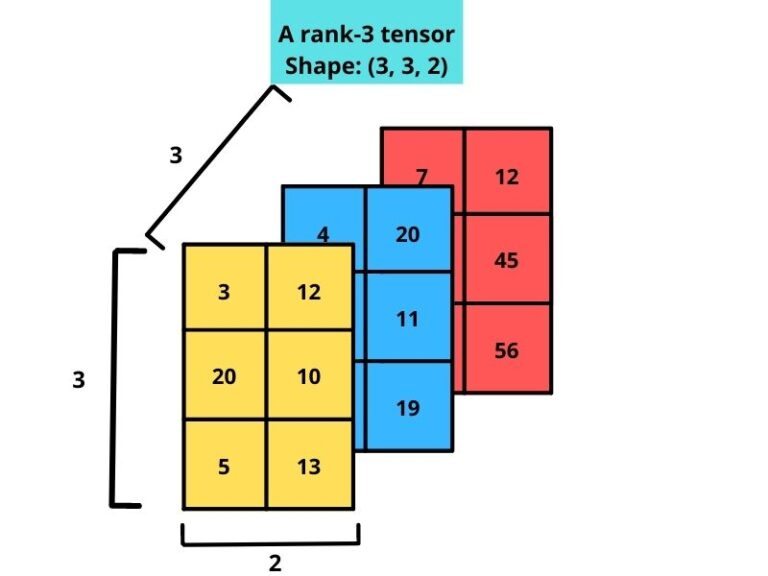

Watch out because the term “dimension” is sometimes used in two ways. Consider that we live in “three-dimensional space,” where a physical position can be described by a vector v, of length 3. But according to PyTorch, the attribute v.ndim (which sure looks like the “number of dimensions” of v) equals one, not three! Why? Because v is a vector, which is a tensor of rank one, meaning that it has only one axis (even if that axis has a length of three). In other words, sometimes dimension is used for the size of an axis (“space is three-dimensional”), while other times it is used for the rank, or the number of axes (“a matrix has two dimensions”). When confused, I find it helpful to translate all statements into terms of **rank, axis, and length**, which are unambiguous terms.

Now, we can compute what the ideal 3 looks like. We calculate the mean of all the image tensors by taking the mean along dimension 0 of our stacked, rank-3 tensor. This is the dimension that indexes over all the images

In other words, for every pixel position, this will compute the average of that pixel over all images.

The result will be one values for every pixel position, or a single image

<Axes: >

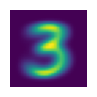

In [15]:
# The Ideal 3 according to this dataset
mean3 = stacked_threes.mean(0)
show_image(mean3)

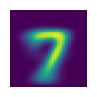

In [16]:
mean7 = stacked_sevens.mean(0)
mean7
show_image(mean7);

Let’s now pick an arbitrary 3 and measure its distance from our “ideal digits.”

How can we determine a random sample's distance from our ideal 3?

Cannot:
Can’t just add up the differences between the pixels of this image and the ideal digit. Some differences will be positive, while others will be negative, and these differences will cancel out, resulting in a situation where an image that is too dark in some places and too light in others might be shown as having zero total differences from the ideal. That would be misleading!

Can:
To avoid this, data scientists use two main ways to measure distance in this context:
* Take the mean of the absolute value of differences (absolute value is the function that replaces negative values with positive values). This is called the mean absolute difference or L1 norm.
* Take the mean of the square of differences (which makes everything positive) and then take the square root (which undoes the squaring). This is called the root mean squared error (RMSE) or L2 norm.

<Axes: >

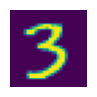

In [17]:
# Example 1 of Stacked_Threes
a_3 = stacked_threes[1]
show_image(a_3)

In [18]:
dist_3_abs = (a_3 - mean3).abs().mean()
dist_3_sqr = ((a_3  - mean3)**2).mean().sqrt()
dist_3_abs, dist_3_sqr

(tensor(0.1114), tensor(0.2021))

In [19]:
dist_7_abs = (a_3 - mean7).abs().mean()
dist_7_sqr = ((a_3 - mean7)**2).mean().sqrt()
dist_7_abs,dist_7_sqr

(tensor(0.1586), tensor(0.3021))

In both cases, the distance between our 3 and the “ideal” 3 is less than the distance to the ideal 7, so our simple model will give the right prediction in this case.

PyTorch already provides both of these as loss functions. You’ll find these inside torch.nn.functional, which the PyTorch team recommends importing as F (and is available by default under that name in fastai):



In [20]:
F.l1_loss(a_3.float(),mean7), F.mse_loss(a_3,mean7).sqrt()

(tensor(0.1586), tensor(0.3021))

Here, MSE stands for mean squared error, and l1 refers to the standard mathematical jargon for mean absolute value (in math it’s called the L1 norm).

Intuitively, the difference between L1 norm and mean squared error (MSE) is that the latter will penalize bigger mistakes more heavily than the former (and be more lenient with small mistakes)

Tensors we will use to calculate a metric measuring the quality of our first-try model, which measures distance from an ideal image:

In [21]:
valid_3_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'3').ls()])
valid_3_tens = valid_3_tens.float()/255
valid_7_tens = torch.stack([tensor(Image.open(o))
                            for o in (path/'valid'/'7').ls()])
valid_7_tens = valid_7_tens.float()/255

valid_3_tens.shape,valid_7_tens.shape

(torch.Size([1010, 28, 28]), torch.Size([1028, 28, 28]))

Good to get in the habit of checking shapes as you go. Here we see two tensors, one representing the 3s validation set of 1,010 images of size 28×28, and one representing the 7s validation set of 1,028 images of size 28×28.

Ultimately want to write a function, is_3, that will decide whether an arbitrary image is a 3 or a 7. It will do this by deciding which of our two “ideal digits” that arbitrary image is closer to. For that we need to define a notion of distance—that is, a function that calculates the distance between two images.

In [22]:
def mnist_distance(a,b):
  return (a-b).abs().mean((-1,-2))

#Testing Function
mnist_distance(a_3, mean3)

tensor(0.1114)

This is the same value we previously calculated for the distance between these two images, the ideal 3 mean3 and the arbitrary sample 3 a_3, which are both single-image tensors with a shape of [28,28].

To calculate a metric for overall accuracy, we will need to calculate the distance to the ideal 3 for every image in the validation set

Take this exact same distance function, designed for comparing two single images, but pass in as an argument valid_3_tens, the tensor that represents the 3s validation set

In [23]:
valid_3_dist = mnist_distance(valid_3_tens, mean3)
valid_3_dist, valid_3_dist.shape

(tensor([0.1193, 0.1191, 0.1430,  ..., 0.1174, 0.1493, 0.1170]),
 torch.Size([1010]))

Instead of complaining about shapes not matching, it returned the distance for every single image as a vector (i.e., a rank-1 tensor) of length 1,010 (the number of 3s in our validation set)

The magic trick is that PyTorch, when it tries to perform a simple subtraction operation between two tensors of different ranks, will use broadcasting: it will automatically expand the tensor with the smaller rank to have the same size as the one with the larger rank. Broadcasting is an important capability that makes tensor code much easier to write.

In this case, PyTorch treats mean3, a rank-2 tensor representing a single image, as if it were 1,010 copies of the same image, and then subtracts each of those copies from each 3 in our validation set

Important points about how broadcasting is implemented, for expressivity as well as performance:
* PyTorch doesn’t actually copy mean3 1,010 times. It pretends it were a tensor of that shape, but doesn’t allocate any additional memory.
* Does the whole calculation in C (or, if you’re using a GPU, in CUDA, the equivalent of C on the GPU), tens of thousands of times faster than pure Python (up to millions of times faster on a GPU!).

This is true of all broadcasting and elementwise operations and functions done in PyTorch. It’s the most important technique for you to know to create efficient PyTorch code.

We can use mnist_distance to figure out whether an image is a 3 by using the following logic: **if the distance between the digit in question and the ideal 3 is less than the distance to the ideal 7, then it’s a 3.**

This function will automatically do broadcasting and be applied elementwise, just like all PyTorch functions and operators:

In [24]:
def is_3(x):
  return mnist_distance(x,mean3) < mnist_distance(x,mean7)

In [25]:
is_3(a_3), is_3(a_3).float()

(tensor(True), tensor(1.))

In [26]:
is_3(valid_3_tens)

tensor([True, True, True,  ..., True, True, True])

In [27]:
# Calculating Accuracy

accuracy_3s = is_3(valid_3_tens).float().mean()
accuracy_7s = (1 - is_3(valid_7_tens).float()).mean()

accuracy_3s,accuracy_7s,(accuracy_3s+accuracy_7s)/2

(tensor(0.9168), tensor(0.9854), tensor(0.9511))

This looks like a pretty good start! We’re getting over 90% accuracy on both 3s and 7s, and we’ve seen how to define a metric conveniently using broadcasting. But let’s be honest: 3s and 7s are very different-looking digits. And we’re classifying only 2 out of the 10 possible digits so far. So we’re going to need to do better!

# Stochastic Gradient Descent

Arrange for some automatic means of testing the effectiveness of any current weight assignment in terms of actual performance and provide a mechanism for altering the weight assignment so as to maximize the performance. Machine so programmed would “learn” from its experience.

Our pixel similarity approach does not really do this. We do not have any kind of weight assignment, or any way of improving based on testing the effectiveness of a weight assignment. To take advantage of the power of deep learning, we will first have to represent our task in the way that Samuel described it.

Instead of trying to find the similarity between an image and an “ideal image,” we could instead look at each individual pixel and come up with a set of weights for each, such that the highest weights are associated with those pixels most likely to be black for a particular category. For instance, pixels toward the bottom right are not very likely to be activated for a 7, so they should have a low weight for a 7, but they are likely to be activated for an 3, so they should have a high weight for an 3. This can be represented as a function and set of weight values for each possible category—for instance, the probability of being the number 3:

In [28]:
def pr_three(x, w):
  return (x*w).sum()


To be more specific, here are the steps required to turn this function into a machine learning classifier:

1. Initialize the weights.
2. For each image, use these weights to predict whether it appears to be a 3 or a 7.
3. Based on these predictions, calculate how good the model is (its loss).
4. Calculate the gradient, which measures for each weight how changing that weight would change the loss.
5. Step (that is, change) all the weights based on that calculation.
6. Go back to step 2 and repeat the process.
7. Iterate until you decide to stop the training process (for instance, because the model is good enough or you don’t want to wait any longer).

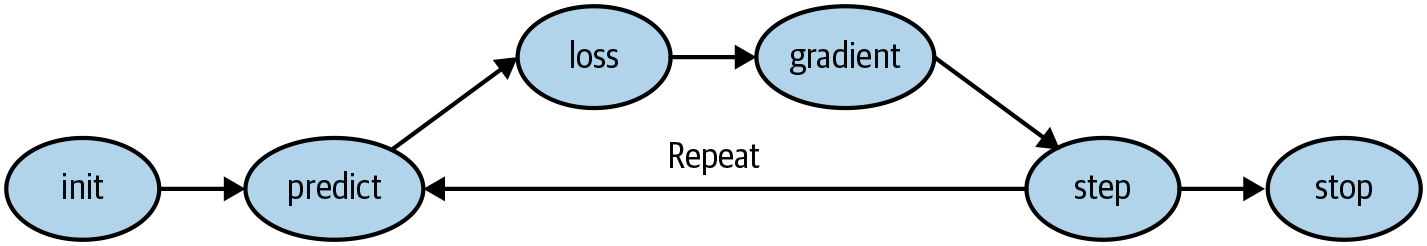

There are many ways to do each of these seven steps, and we will be learning about them throughout the rest of this book. These are the details that make a big difference for deep learning practitioners, but it turns out that the general approach to each one follows some basic principles. Here are a few guidelines:

1. **Initialise**: We initialize the parameters to random values. This may sound surprising. There are certainly other choices we could make, such as initializing them to the percentage of times that pixel is activated for that category—but since we already know that we have a routine to improve these weights, it turns out that just starting with random weights works perfectly well.
2. **Loss**: This is what Samuel referred to when he spoke of testing the effectiveness of any current weight assignment in terms of actual performance. We need a function that will return a number that is small if the performance of the model is good (the standard approach is to treat a small loss as good and a large loss as bad, although this is just a convention).
3. **Step**: imple way to figure out whether a weight should be increased a bit or decreased a bit would be just to try it: increase the weight by a small amount, and see if the loss goes up or down. Once you find the correct direction, you could then change that amount by a bit more, or a bit less, until you find an amount that works well. However, this is slow! As we will see, the magic of calculus allows us to directly figure out in which direction, and by roughly how much, to change each weight, without having to try all these small changes. The way to do this is by calculating gradients. This is just a performance optimization; we would get exactly the same results by using the slower manual process as well.
4. **Stop**: Once we’ve decided how many epochs to train the model for (a few suggestions for this were given in the earlier list), we apply that decision. For our digit classifier, we would keep training until the accuracy of the model started getting worse, or we ran out of time.



## Calculating Gradients
The gradients will tell us how much we have to change each weight to make our model better.

The key point about a derivative is this: for any function, such as the quadratic function we saw in the previous section, we can calculate its derivative. The derivative is another function. It calculates the change, rather than the value. For instance, the derivative of the quadratic function at the value 3 tells us how rapidly the function changes at the value 3. More specifically, you may recall that gradient is defined as rise/run; that is, the change in the value of the function, divided by the change in the value of the parameter. When we know how our function will change, we know what we need to do to make it smaller.

This is the key to machine learning: having a way to change the parameters of a function to make it smaller. Calculus provides us with a computational shortcut, the derivative, which lets us directly calculate the gradients of our functions.

**One important thing to be aware of is that our function has lots of weights that we need to adjust, so when we calculate the derivative, we won’t get back one number, but lots of them—a gradient for every weight.** But there is nothing mathematically tricky here; you can calculate the derivative with respect to one weight and treat all the other ones as constant, and then repeat that for each other weight. This is how all of the gradients are calculated, for every weight.

## Stepping with the Learning Rate

Multiplying the gradient by some small number, where the small number is formally called the learning rate (LR). Once you've picked a learning rte, you can adjust parameters using the following function: **w -= w.grad * lr**

This function is as stepping your parameters, using an optimization step.


# MNIST Loss Function

In [29]:
train_x = torch.cat([stacked_threes, stacked_sevens]).view(-1, 28*28)
train_x

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [30]:
train_y = tensor([1]*len(threes) + [0]*len(sevens)).unsqueeze(1)
train_y
train_x.shape,train_y.shape

(torch.Size([12396, 784]), torch.Size([12396, 1]))

In [31]:
dset = list(zip(train_x,train_y))
x,y = dset[0]
x.shape,y

(torch.Size([784]), tensor([1]))

In [32]:
valid_x = torch.cat([valid_3_tens, valid_7_tens]).view(-1, 28*28)
valid_y = tensor([1]*len(valid_3_tens) + [0]*len(valid_7_tens)).unsqueeze(1)
valid_dset = list(zip(valid_x,valid_y))

In [33]:
# Initialise Params. Need an (initially random) weight for every pixel (this is the initialize step in our seven-step process):
def init_params(size,std=1.0):
  return(torch.randn(size)*std).requires_grad_()



In [34]:
weights = init_params((28*28,1))
weights

tensor([[ 1.9269e+00],
        [ 1.4873e+00],
        [ 9.0072e-01],
        [-2.1055e+00],
        [ 6.7842e-01],
        [-1.2345e+00],
        [-4.3067e-02],
        [-1.6047e+00],
        [-7.5214e-01],
        [ 1.6487e+00],
        [-3.9248e-01],
        [-1.4036e+00],
        [-7.2788e-01],
        [-5.5943e-01],
        [-7.6884e-01],
        [ 7.6245e-01],
        [ 1.6423e+00],
        [-1.5960e-01],
        [-4.9740e-01],
        [ 4.3959e-01],
        [-7.5813e-01],
        [ 1.0783e+00],
        [ 8.0080e-01],
        [ 1.6806e+00],
        [ 1.2791e+00],
        [ 1.2964e+00],
        [ 6.1047e-01],
        [ 1.3347e+00],
        [-2.3162e-01],
        [ 4.1759e-02],
        [-2.5158e-01],
        [ 8.5986e-01],
        [-1.3847e+00],
        [-8.7124e-01],
        [-2.2337e-01],
        [ 1.7174e+00],
        [ 3.1888e-01],
        [-4.2452e-01],
        [ 3.0572e-01],
        [-7.7459e-01],
        [-1.5576e+00],
        [ 9.9564e-01],
        [-8.7979e-01],
        [-6

In [35]:
bias = init_params(1)

In neural networks, the w in the equation y=w*x+b is called the weights, and the b is called the bias. Together, the weights and bias make up the parameters.

JARGON: PARAMETERS
The weights and biases of a model. The weights are the w in the equation w*x+b, and the biases are the b in that equation.

```
# This is formatted as code
```



In [36]:
# Now, calculate a prediction for one image

(train_x[0]*weights.T).sum() + bias

tensor([-6.2330], grad_fn=<AddBackward0>)

In [37]:
# In Python, matrix multiplication is represented with the @ operator
# XB is the matrix being passed in. @weights signifies matrix mult of XB @ Weights. + Bias
def linear1(xb):
  return xb@weights + bias
preds = linear1(train_x)
preds

tensor([[ -6.2330],
        [-10.6388],
        [-20.8865],
        ...,
        [-15.9176],
        [ -1.6866],
        [-11.3568]], grad_fn=<AddBackward0>)

batch @ weights + bias, is one of the two fundamental equations of any neural network

In [38]:
corrects = (preds>0.0).float() == train_y
corrects

tensor([[False],
        [False],
        [False],
        ...,
        [ True],
        [ True],
        [ True]])

In [39]:
corrects.float().mean().item()

0.5379961133003235

As we’ve seen, we need gradients in order to improve our model using SGD

In order to calculate gradients we need a loss function that represents how good our model is.

Gradients are a measure of how that loss function changes with small tweaks to the weights.



### Using Accuracy as our metric and our loss function?

In mathematical terms, accuracy is a function that is constant almost everywhere (except at the threshold, 0.5), so its derivative is nil almost everywhere (and infinity at the threshold). This then gives gradients that are 0 or infinite, which are useless for updating the model.

Concretely, Accuracy changes at all only when a prediction changes from a 3 to a 7, or vice versa. The problem is that a small change in weights from x_old to x_new isn’t likely to cause any prediction to change, so (y_new – y_old) will almost always be 0. In other words, the gradient is 0 almost everywhere.

**Instead, we need a loss function that, when our weights result in slightly better predictions, gives us a slightly better loss.**

The loss function receives not the images themselves, but the predictions from the model. So let’s make one argument, prds, of values between 0 and 1, where each value is the prediction that an image is a 3. It is a vector (i.e., a rank-1 tensor) indexed over the images.

Purpose of the loss function is to measure the difference between predicted values and the true values—that is, the targets (aka labels). Let’s therefore make another argument, trgts, with values of 0 or 1 that tells whether an image actually is a 3 or not. It is also a vector (i.e., another rank-1 tensor) indexed over the images.

For instance, suppose we had three images that we knew were a 3, a 7, and a 3. And suppose our model predicted with high confidence (0.9) that the first was a 3, with slight confidence (0.4) that the second was a 7, and with fair confidence (0.2), but incorrectly, that the last was a 7. This would mean our loss function would receive these values as its inputs:

trgts  = tensor([1,0,1])

prds   = tensor([0.9, 0.4, 0.2])


# Metric vs Loss Function

Key difference is that the metric is to drive human understanding and the loss is to drive automated learning.

To drive automated learning, the loss must be a function that has a meaningful derivative. It can’t have big flat sections and large jumps, but instead must be reasonably smooth. This is why we designed a loss function that would respond to small changes in confidence level.

This requirement means that sometimes it does not really reflect exactly what we are trying to achieve, but is rather a compromise between our real goal and a function that can be optimized using its gradient. The loss function is calculated for each item in our dataset, and then at the end of an epoch, the loss values are all averaged and the overall mean is reported for the epoch.

Metrics, on the other hand, are the numbers that we care about. These are the values that are printed at the end of each epoch that tell us how our model is doing. It is important that we learn to focus on these metrics, rather than the loss, when judging the performance of a model.



# Optimisation

Next phase of the learning process is to change or update the weights based on the gradients. This is called an optimization step.

To take an optimization step, we need to calculate the loss over one or more data items. How many should we use? We could calculate it for the whole dataset and take the average, or we could calculate it for a single data item. But neither of these is ideal. Calculating it for the whole dataset would take a long time. Calculating it for a single item would not use much information, so it would result in an imprecise and unstable gradient.

Instead we compromise: we calculate the average loss for a few data items at a time. This is called a mini-batch. The number of data items in the mini-batch is called the batch size.

Larger batch size means that you will get a more accurate and stable estimate of your dataset’s gradients from the loss function, but it will take longer, and you will process fewer mini-batches per epoch. Choosing a good batch size is one of the decisions you need to make as a deep learning practitioner to train your model quickly and accurately.

GPU accelerators perform well only if they have lots of work to do at a time, so it’s helpful if we can give them lots of data items to work on. Using mini-batches is one of the best ways to do this. However, if you give them too much data to work on at once, they run out of memory—making GPUs happy is also tricky!

One simple and effective thing we can vary is what data items we put in each mini-batch. Rather than simply enumerating our dataset in order for every epoch, instead what we normally do is randomly shuffle it on every epoch, before we create mini-batches. PyTorch and fastai provide a class that will do the shuffling and mini-batch collation for you, called DataLoader.

DataLoader can take any Python collection and turn it into an iterator over many batches

In [40]:
coll = range(15)
dl = DataLoader(coll, batch_size=5, shuffle=True)
list(dl)

[tensor([ 3, 12,  8, 10,  2]),
 tensor([ 9,  4,  7, 14,  5]),
 tensor([ 1, 13,  0,  6, 11])]

When we pass a Dataset to a DataLoader we will get back many batches that are themselves tuples of tensors representing batches of independent and dependent variables

In [41]:
ds = L(enumerate(string.ascii_lowercase))
ds
dl = DataLoader(ds, batch_size=6, shuffle=True)
list(dl)

[(tensor([17, 18, 10, 22,  8, 14]), ('r', 's', 'k', 'w', 'i', 'o')),
 (tensor([20, 15,  9, 13, 21, 12]), ('u', 'p', 'j', 'n', 'v', 'm')),
 (tensor([ 7, 25,  6,  5, 11, 23]), ('h', 'z', 'g', 'f', 'l', 'x')),
 (tensor([ 1,  3,  0, 24, 19, 16]), ('b', 'd', 'a', 'y', 't', 'q')),
 (tensor([2, 4]), ('c', 'e'))]

Implementing this now:
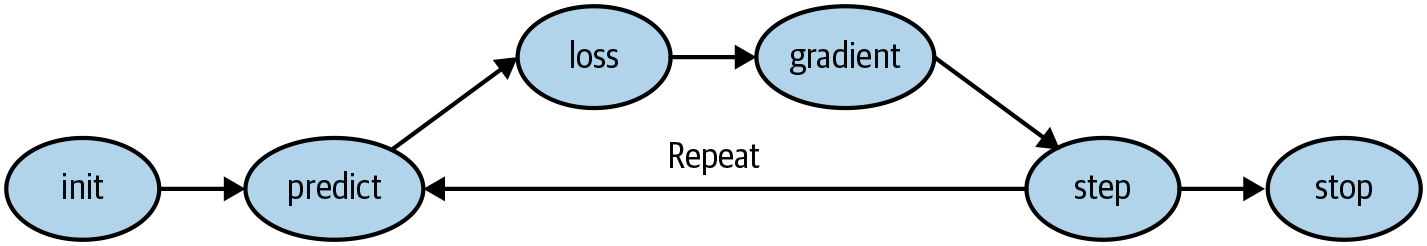

In [47]:
for x,y in dl:
  pred = model(x)
  loss = loss_func(pred,y)
  loss.backward()
  parameters -= parameters.grad * lr

NameError: ignored

In [48]:
# Re-Initialise Parameters
weights = init_params((28*28,1))
bias = init_params(1)

#Data-Loader can be created from a Dataset
dl = DataLoader(dset, batch_size = 256)
xb,yb = first(dl)
xb.shape,yb.shape

(torch.Size([256, 784]), torch.Size([256, 1]))

In [49]:
# Do this for the validation set as well
valid_dl = DataLoader(valid_dset, batch_size = 256)

In [50]:
# Create a mini-batch of size 4 for testing:
batch = train_x[:4]
batch.shape

torch.Size([4, 784])

In [51]:
preds = linear1(batch)
preds

tensor([[ 1.5219],
        [-1.1452],
        [ 1.3260],
        [-2.5155]], grad_fn=<AddBackward0>)

In [52]:
def mnist_loss(predictions, targets):
    predictions = predictions.sigmoid()
    return torch.where(targets==1, 1-predictions, predictions).mean()

loss = mnist_loss(preds, train_y[:4])
loss

tensor(0.5182, grad_fn=<MeanBackward0>)

In [53]:
# Calculate Gradients
loss.backward()
weights.grad.shape,weights.grad.mean(),bias.grad

(torch.Size([784, 1]), tensor(-0.0208), tensor([-0.1413]))

In [54]:
# Consolidating in one function
def calc_grad(xb,yb,model):
  preds = model(xb)
  loss = mnist_loss(preds,yb)
  loss.backward()

`loss.backward` adds the gradients of loss to any gradients that are currently stored. So, we have to set the current gradients to 0 first:

In [55]:
# Set Current Gradients to 0
weights.grad.zero_()
bias.grad.zero_()

# Testing Function
calc_grad(batch, train_y[:4], linear1)
weights.grad.mean(),bias.grad

(tensor(-0.0208), tensor([-0.1413]))

IN-PLACE OPERATIONS:

Methods in PyTorch whose names end in an underscore modify their objects in place. For instance, bias.zero_ sets all elements of the tensor bias to 0.

Our only remaining step is to update the weights and biases based on the gradient and learning rate. When we do so, we have to tell PyTorch not to take the gradient of this step too—otherwise, things will get confusing when we try to compute the derivative at the next batch! If we assign to the data attribute of a tensor, PyTorch will not take the gradient of that step. Here’s our basic training loop for an epoch:

In [56]:
def train_epoch(model,lr,params):
  for xb,yb in dl:
    calc_grad(xb,yb,model)
    for p in params:
      p.data -= p.grad*lr
      p.grad.zero_()

In [57]:
(preds>0.5).float() == train_y[:4]

tensor([[ True],
        [False],
        [ True],
        [False]])

In [58]:
# That gives us this function to calculate our validation accuracy
def batch_accuracy(xb, yb):
    preds = xb.sigmoid()
    correct = (preds>0.5) == yb
    return correct.float().mean()

In [59]:
batch_accuracy(linear1(batch), train_y[:4])

tensor(0.5000)

In [60]:
# Put Batches together
def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)

0.7177

In [61]:
# This is our starting point. Now, we train for one epoch and see if the accuracy improves:

lr = 1.
params = weights,bias
train_epoch(linear1, lr, params)
validate_epoch(linear1)

0.7698

In [62]:
for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.9008 0.9384 0.9506 0.957 0.9613 0.9633 0.9648 0.9653 0.9662 0.9677 0.9672 0.9672 0.9696 0.9701 0.9706 0.9706 0.9716 0.9731 0.9731 0.9735 

Our next step will be to create an object that will handle the SGD step for us. In PyTorch, it’s called an optimizer.

For our general foundation, PyTorch provides some useful classes to make it easier to implement.

The first thing we can do is replace our linear1 function with PyTorch’s nn.Linear module.

A module is an object of a class that inherits from the PyTorch nn.Module class. Objects of this class behave identically to standard Python functions, in that you can call them using parentheses, and they will return the activations of a model

nn.Linear does the same thing as our init_params and linear together. It contains both the weights and biases in a single class.

In [63]:
linear_model = nn.Linear(28*28,1)

Every PyTorch module knows what parameters it has that can be trained; they are available through the parameters method:

In [64]:
w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([1, 784]), torch.Size([1]))

Now, we can use this information to create an optimiser

The code you shared is a class definition for `BasicOptim`. It has three methods:
- `__init__`: This method initializes the class and assigns the parameters and learning rate to the class variables.
- `step`: This method updates the parameters by subtracting the gradient multiplied by the learning rate.
- `zero_grad`: This method sets the gradients of the parameters to zero.

This class is used for basic optimization in machine learning models. It is a simple implementation that can be used as a starting point for more complex optimization algorithms.

In [65]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [66]:
# Create Our Optimiser by passing in the model's parameters
opt = BasicOptim(linear_model.parameters(), lr)

In [67]:
#Simplified Training Loop
def train_epoch(model):
  for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()


In [68]:
validate_epoch(linear_model)


0.6318

In [69]:
def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

In [70]:
train_model(linear_model, 20)

0.4932 0.7769 0.8555 0.9165 0.936 0.9478 0.9565 0.9634 0.9658 0.9678 0.9697 0.9717 0.9741 0.9746 0.9756 0.9771 0.9775 0.9775 0.978 0.9785 

fastai provides the SGD class that, by default, does the same thing as our BasicOptim:

In [71]:
linear_model = nn.Linear(28*28,1)
opt = SGD(linear_model.parameters(), lr)
train_model(linear_model, 20)

0.4932 0.8052 0.8506 0.9136 0.9341 0.9487 0.9556 0.9634 0.9663 0.9668 0.9692 0.9707 0.9731 0.9751 0.9761 0.9766 0.9775 0.9775 0.9785 0.9785 

fastai also provides Learner.fit, which we can use instead of train_model. To create a Learner, we first need to create a DataLoaders, by passing in our training and validation DataLoaders

In [72]:
dls = DataLoaders(dl, valid_dl)

To create a Learner without using an application (such as cnn_learner), we need to pass in all the elements that we’ve created in this chapter: the DataLoaders, the model, the optimization function (which will be passed the parameters), the loss function, and optionally any metrics to print:

In [74]:
learn = Learner(dls, nn.Linear(28*28,1), opt_func=SGD, loss_func=mnist_loss, metrics=batch_accuracy)

In [75]:
learn.fit(10,lr=lr)

epoch,train_loss,valid_loss,batch_accuracy,time
0,0.636941,0.503078,0.495584,00:00
1,0.418709,0.253062,0.769872,00:01
2,0.157678,0.163949,0.853288,00:00
3,0.071406,0.100839,0.915113,00:00
4,0.039475,0.074853,0.934249,00:00
5,0.026894,0.060468,0.948970,00:00
6,0.021649,0.051454,0.955839,00:00
7,0.019259,0.045433,0.963199,00:00
8,0.018004,0.041177,0.965162,00:00
9,0.017223,0.038021,0.967615,00:00


There’s nothing magic about the PyTorch and fastai classes. They are just convenient prepackaged pieces that make your life a bit easier!

With these classes, we can now replace our linear model with a neural network.



Here is the entire definition of a basic neural network:



In [76]:
def simple_net(xb):
    res = xb@w1 + b1
    res = res.max(tensor(0.0))
    res = res@w2 + b2
    return res

All we have in simple_net is two linear classifiers with a max function between them.

Amazingly enough, it can be mathematically proven that this little function can solve any computable problem to an arbitrarily high level of accuracy, if you can find the right parameters for w1 and w2 and if you make these matrices big enough.

For any arbitrarily wiggly function, we can approximate it as a bunch of lines joined together; to make it closer to the wiggly function, we just have to use shorter lines. This is known as the universal approximation theorem. The three lines of code that we have here are known as layers. The first and third are known as linear layers, and the second line of code is known variously as a nonlinearity, or activation function.

Here, w1 and w2 are weight tensors, and b1 and b2 are bias tensors; that is, parameters that are initially randomly initialized, just as we did in the previous section:

In [77]:
w1 = init_params((28*28,30))
b1 = init_params(30)
w2 = init_params((30,1))
b2 = init_params(1)

The key point is that w1 has 30 output activations (which means that w2 must have 30 input activations, so they match). That means that the first layer can construct 30 different features, each representing a different mix of pixels. You can change that 30 to anything you like, to make the model more or less complex.

That little function res.max(tensor(0.0)) is called a rectified linear unit, also known as ReLU. We think we can all agree that rectified linear unit sounds pretty fancy and complicated…But actually, there’s nothing more to it than res.max(tensor(0.0))—in other words, replace every negative number with a zero. This tiny function is also available in PyTorch as F.relu

`plot_function(F.relu)`

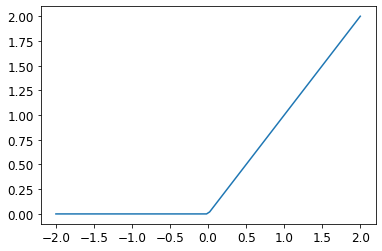



There is an enormous amount of jargon in deep learning, including terms like rectified linear unit. The vast majority of this jargon is no more complicated than can be implemented in a short line of code, as we saw in this example. The reality is that for academics to get their papers published, they need to make them sound as impressive and sophisticated as possible. One way that they do that is to introduce jargon. Unfortunately, this results in the field becoming far more intimidating and difficult to get into than it should be. You do have to learn the jargon, because otherwise papers and tutorials are not going to mean much to you. But that doesn’t mean you have to find the jargon intimidating. Just remember, when you come across a word or phrase that you haven’t seen before, it will almost certainly turn out to be referring to a very simple concept.

The basic idea is that by using more linear layers, we can have our model do more computation, and therefore model more complex functions. But there’s no point in just putting one linear layer directly after another one, because when we multiply things together and then add them up multiple times, that could be replaced by multiplying different things together and adding them up just once! That is to say, a series of any number of linear layers in a row can be replaced with a single linear layer with a different set of parameters.

But if we put a nonlinear function between them, such as max, this is no longer true. Now each linear layer is somewhat decoupled from the other ones and can do its own useful work. The max function is particularly interesting, because it operates as a simple if statement.

Again, we can replace this code with something a bit simpler by taking advantage of PyTorch

In [78]:
simple_net = nn.Sequential(
    nn.Linear(28*28,30),
    nn.ReLU(),
    nn.Linear(30,1)
)

nn.Sequential creates a module that will call each of the listed layers or functions in turn.

nn.ReLU is a PyTorch module that does exactly the same thing as the F.relu function. *Most functions that can appear in a model also have identical forms that are modules. Generally, it’s just a case of replacing F with nn and changing the capitalization. When using nn.Sequential, PyTorch requires us to use the module version.*

Since modules are classes, we have to instantiate them, which is why you see nn.ReLU in this example.

Because nn.Sequential is a module, we can get its parameters, which will return a list of all the parameters of all the modules it contains.

As this is a deeper model, we’ll use a lower learning rate and a few more epochs:

In [79]:
learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)

In [80]:
learn.fit(40, 0.1)


epoch,train_loss,valid_loss,batch_accuracy,time
0,0.353355,0.403497,0.507360,00:00
1,0.160671,0.247380,0.784102,00:00
2,0.087157,0.121174,0.909225,00:00
3,0.056040,0.080432,0.939156,00:00
4,0.041803,0.062397,0.953876,00:00
5,0.034649,0.052382,0.962218,00:00
6,0.030607,0.046102,0.965162,00:00
7,0.028019,0.041825,0.965653,00:00
8,0.026173,0.038725,0.968106,00:00
9,0.024754,0.036365,0.969578,00:00


The training process is recorded in learn.recorder, with the table of output stored in the values attribute, so **we can plot the accuracy over training:**

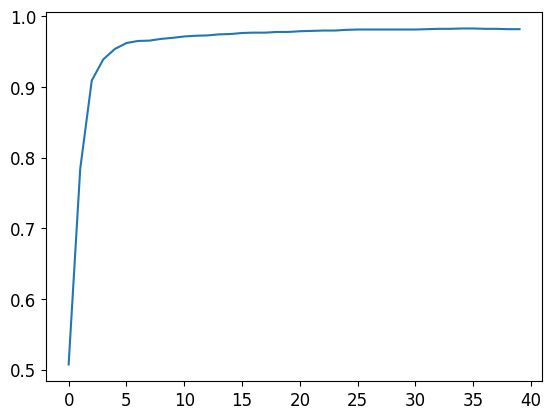

In [82]:
plt.plot(L(learn.recorder.values).itemgot(2));


In [86]:
learn.recorder.values
# At last training epoch, what is the accuracy value
learn.recorder.values[-1][2]

0.981844961643219

At this point, we have something that is rather magical:

* A function that can solve any problem to any level of accuracy (the neural network) given the correct set of parameters

* A way to find the best set of parameters for any function (stochastic gradient descent)